In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to C:\Users\HUYNH THIEN
[nltk_data]     NHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
data = pd.read_csv("./data/mobile_feedback/Cleaned_Train.csv")

In [13]:
data.head()

,Unnamed: 0,index,comment,n_star,date_time,label,positive_count,neutral_count,negative_count
0,0,0,mới mua máy thegioididong thốt_nốt cảm_thấy ok...,5,2020-04-21,Positive,6,0,0
1,1,1,pin kém còn miễn chê mua 832019 tình_trạng pin...,5,2019-09-14,Neutral,1,0,1
2,2,2,sao gọi điện_thoại màn_hình chấm nhỏ nháy gần ...,3,2020-08-17,Negative,0,0,1
3,3,3,mọi người cập_nhật phần_mềm nó bớt tốn pin mìn...,3,2020-02-29,Neutral,0,2,1
4,4,4,mới mua sài 1 tháng thấy pin trâu sài bao mượt...,5,2020-04-06,Positive,2,0,1


In [14]:
data['n_star'].value_counts()

n_star
5    3670
1    1271
4    1266
3    1012
2     567
Name: count, dtype: int64

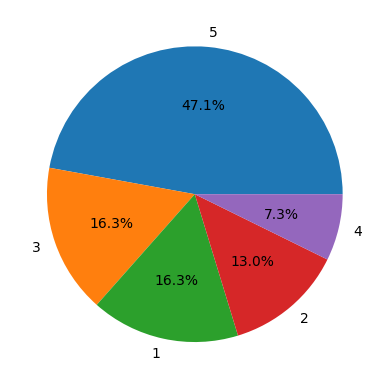

In [15]:
plt.pie(data['n_star'].value_counts(), labels=data['n_star'].unique().tolist(), autopct='%1.1f%%')
plt.show()

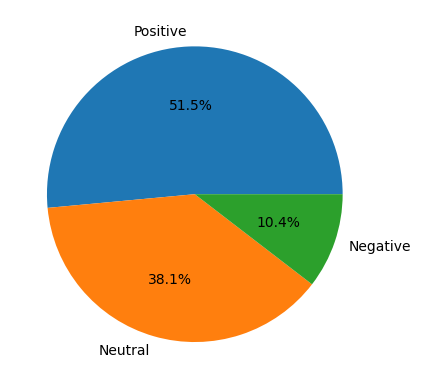

In [16]:
plt.pie(data['label'].value_counts(), labels=data['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

# Exploratory Data Analysis

In [17]:
lenght = len(data['comment'][0])
print(f'Length of a sample comment: {lenght}')

Length of a sample comment: 152


In [18]:
data['Length'] = data['comment'].str.len()
data.head(10)

,Unnamed: 0,index,comment,n_star,date_time,label,positive_count,neutral_count,negative_count,Length
0,0,0,mới mua máy thegioididong thốt_nốt cảm_thấy ok...,5,2020-04-21,Positive,6,0,0,152
1,1,1,pin kém còn miễn chê mua 832019 tình_trạng pin...,5,2019-09-14,Neutral,1,0,1,66
2,2,2,sao gọi điện_thoại màn_hình chấm nhỏ nháy gần ...,3,2020-08-17,Negative,0,0,1,59
3,3,3,mọi người cập_nhật phần_mềm nó bớt tốn pin mìn...,3,2020-02-29,Neutral,0,2,1,78
4,4,4,mới mua sài 1 tháng thấy pin trâu sài bao mượt...,5,2020-04-06,Positive,2,0,1,154
5,5,5,xài tốt mượt pin trâu bạn độ sáng đủ nhân_viên...,5,2019-06-20,Positive,3,2,0,94
6,6,6,mình mới xài 7 tháng xuống 7 pin chả hiểu máy ...,1,2020-04-21,Negative,0,0,1,95
7,7,7,hôm ngày 2362020 e thế_giới di_động mua dthoai...,2,2020-06-23,Negative,0,0,1,320
8,8,8,sao điện_thoại mới sạc nó nóng máy quá trời t_...,2,2019-12-23,Negative,0,0,1,145
9,9,9,đầu định mua samsung shop nhân_viên tư_vấn opp...,1,2020-05-31,Negative,0,0,4,165


## Word Count: Số từ trong mỗi bình luận

In [19]:
word_count = data['comment'][0].split()
print(f'Word count in a sample comment: {len(word_count)}')

Word count in a sample comment: 24


In [20]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [21]:
data['Word_count'] = data['comment'].apply(word_count)
data.head(10)

,Unnamed: 0,index,comment,n_star,date_time,label,positive_count,neutral_count,negative_count,Length,Word_count
0,0,0,mới mua máy thegioididong thốt_nốt cảm_thấy ok...,5,2020-04-21,Positive,6,0,0,152,24
1,1,1,pin kém còn miễn chê mua 832019 tình_trạng pin...,5,2019-09-14,Neutral,1,0,1,66,14
2,2,2,sao gọi điện_thoại màn_hình chấm nhỏ nháy gần ...,3,2020-08-17,Negative,0,0,1,59,10
3,3,3,mọi người cập_nhật phần_mềm nó bớt tốn pin mìn...,3,2020-02-29,Neutral,0,2,1,78,17
4,4,4,mới mua sài 1 tháng thấy pin trâu sài bao mượt...,5,2020-04-06,Positive,2,0,1,154,35
5,5,5,xài tốt mượt pin trâu bạn độ sáng đủ nhân_viên...,5,2019-06-20,Positive,3,2,0,94,18
6,6,6,mình mới xài 7 tháng xuống 7 pin chả hiểu máy ...,1,2020-04-21,Negative,0,0,1,95,21
7,7,7,hôm ngày 2362020 e thế_giới di_động mua dthoai...,2,2020-06-23,Negative,0,0,1,320,57
8,8,8,sao điện_thoại mới sạc nó nóng máy quá trời t_...,2,2019-12-23,Negative,0,0,1,145,31
9,9,9,đầu định mua samsung shop nhân_viên tư_vấn opp...,1,2020-05-31,Negative,0,0,4,165,29


## Mean word length: Độ dài trung bình của từ

In [22]:
data['mean_word_length'] = data['comment'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,Unnamed: 0,index,comment,n_star,date_time,label,positive_count,neutral_count,negative_count,Length,Word_count,mean_word_length
0,0,0,mới mua máy thegioididong thốt_nốt cảm_thấy ok...,5,2020-04-21,Positive,6,0,0,152,24,5.375000
1,1,1,pin kém còn miễn chê mua 832019 tình_trạng pin...,5,2019-09-14,Neutral,1,0,1,66,14,3.785714
2,2,2,sao gọi điện_thoại màn_hình chấm nhỏ nháy gần ...,3,2020-08-17,Negative,0,0,1,59,10,5.000000
3,3,3,mọi người cập_nhật phần_mềm nó bớt tốn pin mìn...,3,2020-02-29,Neutral,0,2,1,78,17,3.647059
4,4,4,mới mua sài 1 tháng thấy pin trâu sài bao mượt...,5,2020-04-06,Positive,2,0,1,154,35,3.428571
5,5,5,xài tốt mượt pin trâu bạn độ sáng đủ nhân_viên...,5,2019-06-20,Positive,3,2,0,94,18,4.277778
6,6,6,mình mới xài 7 tháng xuống 7 pin chả hiểu máy ...,1,2020-04-21,Negative,0,0,1,95,21,3.571429
7,7,7,hôm ngày 2362020 e thế_giới di_động mua dthoai...,2,2020-06-23,Negative,0,0,1,320,57,4.631579
8,8,8,sao điện_thoại mới sạc nó nóng máy quá trời t_...,2,2019-12-23,Negative,0,0,1,145,31,3.709677
9,9,9,đầu định mua samsung shop nhân_viên tư_vấn opp...,1,2020-05-31,Negative,0,0,4,165,29,4.724138


## Mean Sentence Length: Độ dài trung bình của câu

In [23]:
mean_sent_len = np.mean(data['Length'])
mean_sent_len

123.33688671975341

In [24]:
def visualize(col, data):
    plt.figure(figsize=(12, 5))

    plt.subplot(1,2,1)
    sns.boxplot(y=col, x='label', data=data)
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(data=data, x=col, hue='label', fill=True)
    plt.xlabel('')
    plt.ylabel('')

    plt.show()


In [25]:
data.columns.tolist()[9:]

['Length', 'Word_count', 'mean_word_length']

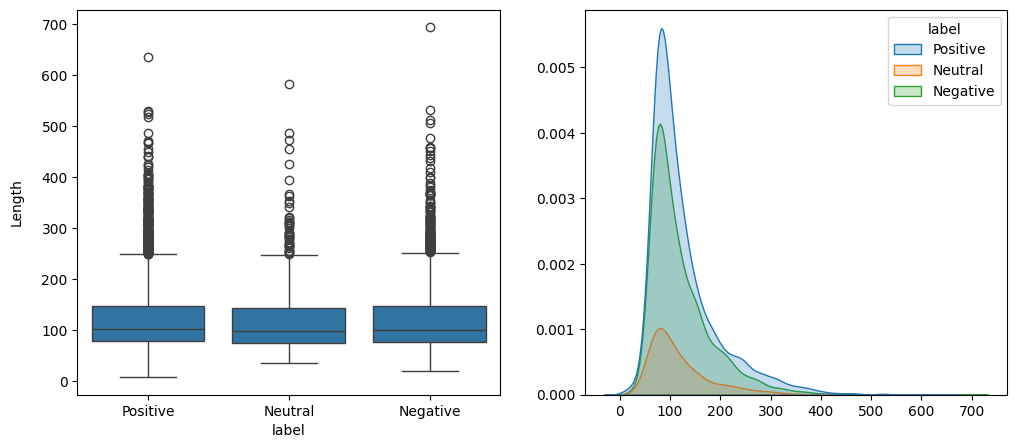

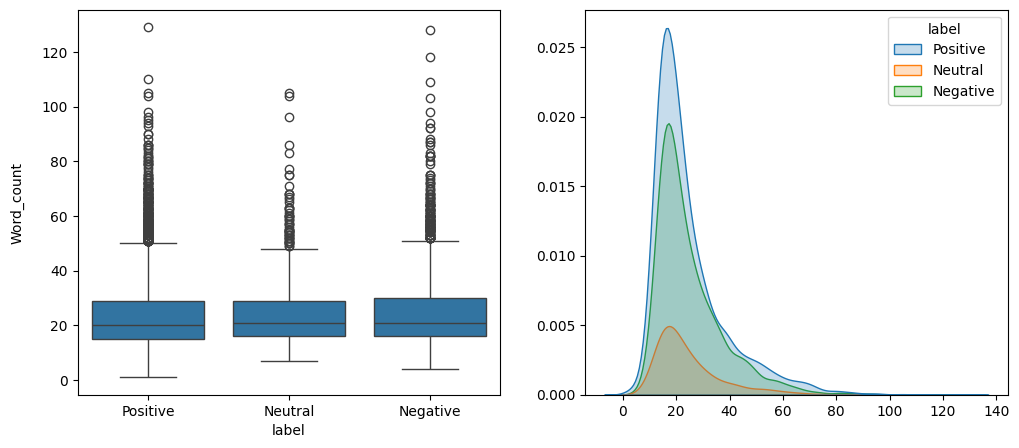

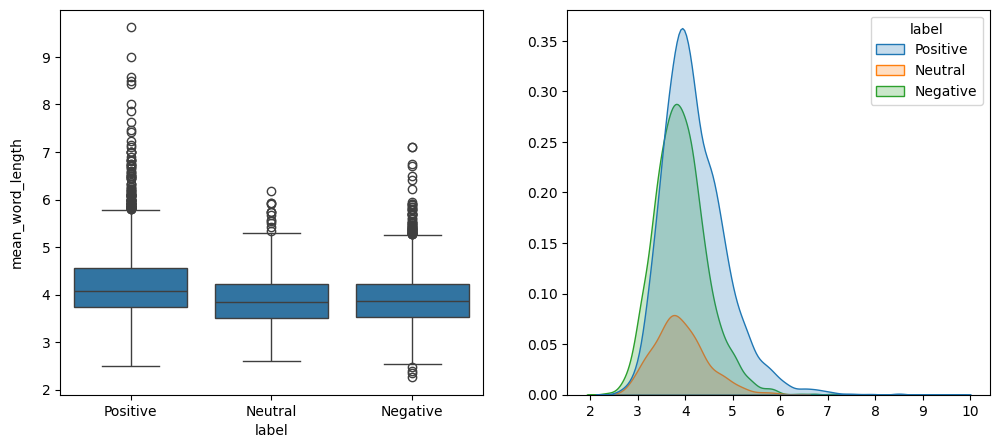

In [26]:
features = data.columns.tolist()[9:]
for feature in features:
    visualize(feature, data)

## Tương quan giữa Positive, Negative, Neutral và Rating (n_star)

In [27]:
correlation_matrix = data[['positive_count', 'negative_count', 'neutral_count', 'n_star']].corr()
print(correlation_matrix)

                positive_count  negative_count  neutral_count    n_star
positive_count        1.000000       -0.569190       0.042316  0.649603
negative_count       -0.569190        1.000000      -0.152952 -0.690165
neutral_count         0.042316       -0.152952       1.000000  0.141182
n_star                0.649603       -0.690165       0.141182  1.000000


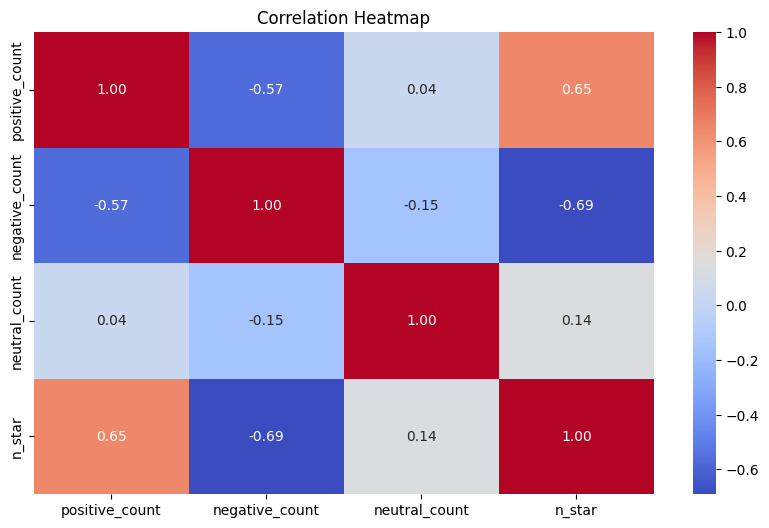

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['positive_count', 'negative_count', 'neutral_count', 'n_star']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Tương quan độ dài câu và trạng thái đánh giá

In [29]:
# Tính toán số lượng các giá trị tích cực, tiêu cực và trung tính cho mỗi độ dài câu
positive_counts = (data[data['label'] == 'Positive'].groupby('Word_count').size())
negative_counts = (data[data['label'] == 'Negative'].groupby('Word_count').size())
neutral_counts = (data[data['label'] == 'Neutral'].groupby('Word_count').size())

In [30]:
# Chia khoảng cho độ dài câu
bins = range(0, 141, 20)
positive_counts_bins = pd.cut(positive_counts.index, bins=bins, right=False)
negative_counts_bins = pd.cut(negative_counts.index, bins=bins, right=False)
neutral_counts_bins = pd.cut(neutral_counts.index, bins=bins, right=False)

# Đếm số lượng đánh giá cho từng trạng thái theo độ dài câu
positive_counts_segmented = positive_counts.groupby(positive_counts_bins).sum()
negative_counts_segmented = negative_counts.groupby(negative_counts_bins).sum()
neutral_counts_segmented = neutral_counts.groupby(neutral_counts_bins).sum()

print("Positive Counts:")
print(positive_counts_segmented)
print("\nNegative Counts:")
print(negative_counts_segmented)
print("\nNeutral Counts:")
print(neutral_counts_segmented)

Positive Counts:
[0, 20)       1876
[20, 40)      1617
[40, 60)       375
[60, 80)       114
[80, 100)       22
[100, 120)       3
[120, 140)       1
dtype: int64

Negative Counts:
[0, 20)       1286
[20, 40)      1316
[40, 60)       289
[60, 80)        57
[80, 100)       14
[100, 120)       3
[120, 140)       1
dtype: int64

Neutral Counts:
[0, 20)       366
[20, 40)      343
[40, 60)       79
[60, 80)       19
[80, 100)       3
[100, 120)      2
[120, 140)      0
dtype: int64


C:\Users\HUYNH THIEN NHAN\AppData\Local\Temp\ipykernel_18476\2325979997.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_counts_segmented = positive_counts.groupby(positive_counts_bins).sum()
C:\Users\HUYNH THIEN NHAN\AppData\Local\Temp\ipykernel_18476\2325979997.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  negative_counts_segmented = negative_counts.groupby(negative_counts_bins).sum()
C:\Users\HUYNH THIEN NHAN\AppData\Local\Temp\ipykernel_18476\2325979997.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ

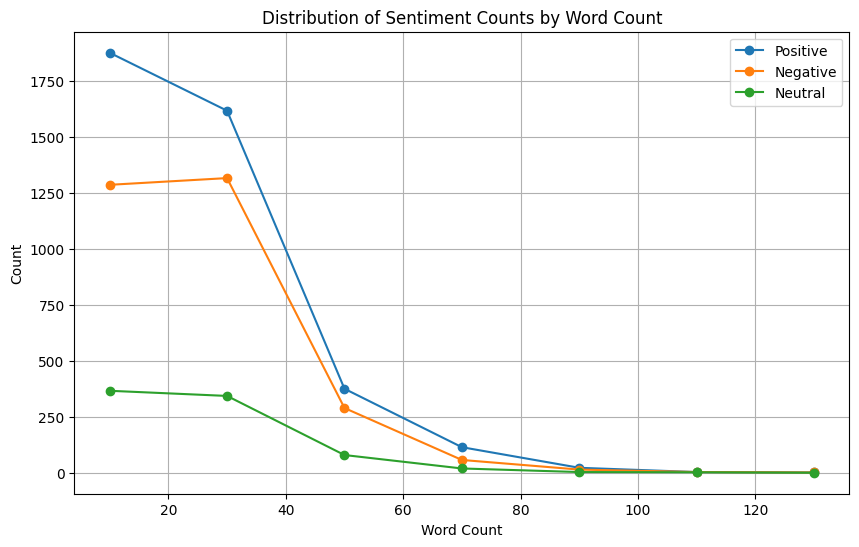

In [31]:
# Xác định vị trí cho các điểm là giữa miền giá trị
x_values = [interval.mid for interval in positive_counts_segmented.index]

# Trực quan hóa kết quả bằng biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(x_values, positive_counts_segmented.values, label='Positive', marker='o')
plt.plot(x_values, negative_counts_segmented.values, label='Negative', marker='o')
plt.plot(x_values, neutral_counts_segmented.values, label='Neutral', marker='o')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Counts by Word Count')
plt.legend()
plt.grid(True)
plt.show()
